## Análisis exploratorio y visualización de métricas por categoría y canal en noticias de YouTube

Mounted at /content/drive


,Categoría,Cantidad de videos
0,Internacional Medio Oriente,3814
1,Internacional,2364
2,Palestina,1345
3,Israel,1043


,Canal,Cantidad de videos
0,al jazeera,1747
1,trt world,1110
2,france 24,1048
3,middle east eye,782
4,voices for gaza,758
5,dw news,581
6,i24news,499
7,bbc,496
8,iltv,395
9,electronic intifada,393


<ipython-input-2-9a1f0ce7a49f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tabla_categoria, x='Categoría', y='Cantidad de videos', palette=palette_profesional)
<ipython-input-2-9a1f0ce7a49f>:49: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(data=tabla_categoria, x='Categoría', y='Cantidad de videos', palette=palette_profesional)


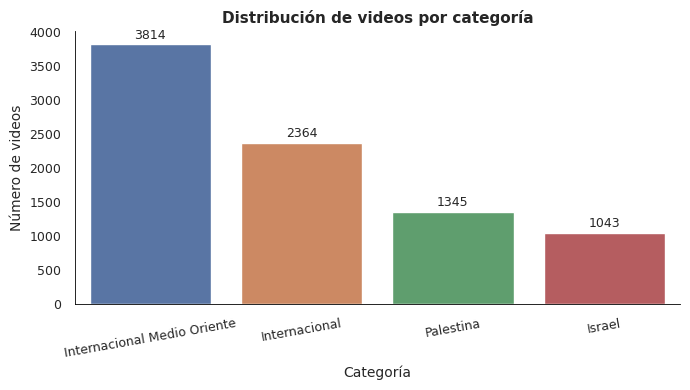

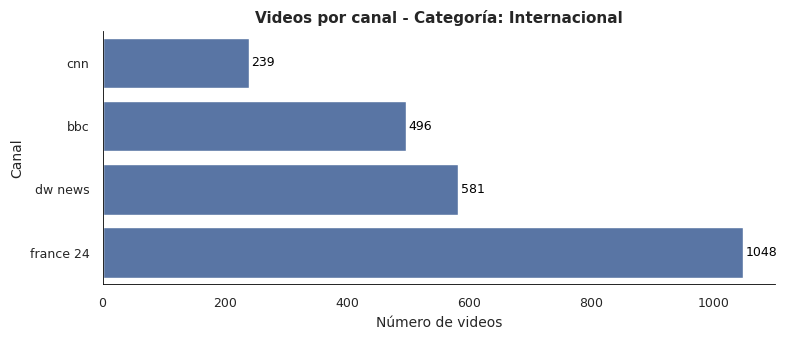

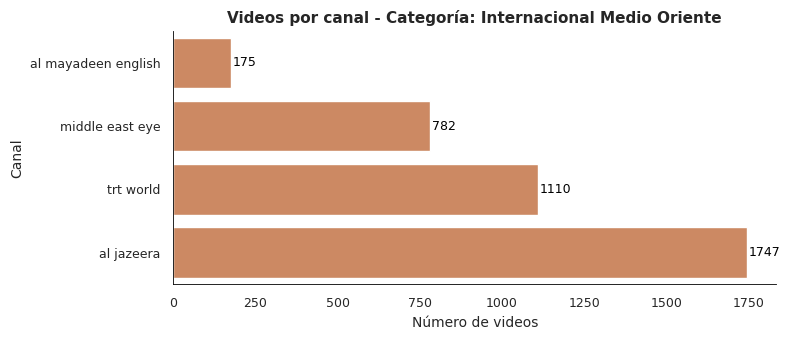

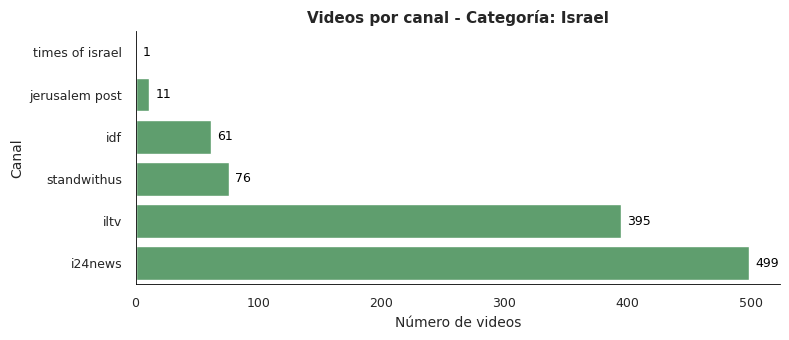

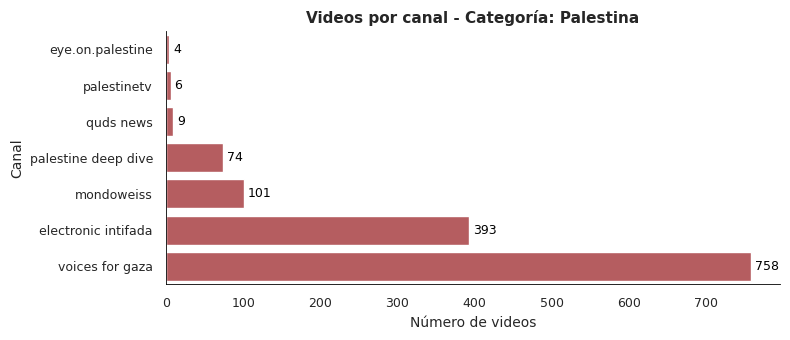

,categoria,videos_totales,promedio_views,mediana_views,max_views,promedio_likes,promedio_comments,promedio_engagement_rate
0,Internacional,2364,115725.02,22298.0,9181879,1236.27,781.00,0.02
1,Internacional Medio Oriente,3814,132931.74,27456.0,39272223,6685.07,716.06,0.07
2,Israel,1043,77771.52,21639.0,5308812,2536.16,367.63,0.04
3,Palestina,1345,27367.09,4969.0,1973279,1800.30,187.33,0.14


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
from IPython.display import display

# === Configurar estilo profesional y compatible ===
sns.set_theme(style="white")
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.6,
    'legend.fontsize': 9
})

# === Paleta profesional ===
palette_profesional = sns.color_palette("deep")

# === Crear carpeta de salida si no existe ===
output_dir = "/content/drive/MyDrive/TG/output_visualizaciones_2"
os.makedirs(output_dir, exist_ok=True)

# === Cargar dataset ===
df = pd.read_csv("/content/drive/MyDrive/TG/noticias_youtube_limpio.csv")

# === TABLA 1: Total por categoría ===
tabla_categoria = df['categoria'].value_counts().reset_index()
tabla_categoria.columns = ['Categoría', 'Cantidad de videos']
display(tabla_categoria)
tabla_categoria.to_csv(f"{output_dir}/tabla_categoria.csv", index=False)

# === TABLA 2: Total por canal ===
tabla_canal = df['channel_clean'].value_counts().reset_index()
tabla_canal.columns = ['Canal', 'Cantidad de videos']
display(tabla_canal)
tabla_canal.to_csv(f"{output_dir}/tabla_canal.csv", index=False)

# === GRÁFICO 1: Barras por categoría ===
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=tabla_categoria, x='Categoría', y='Cantidad de videos', palette=palette_profesional)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=2, fontsize=9)
plt.title("Distribución de videos por categoría", weight='bold', fontsize=11)
plt.xlabel("Categoría")
plt.ylabel("Número de videos")
plt.xticks(rotation=10)
sns.despine()
ax.grid(False)
plt.tight_layout()
plt.savefig(f"{output_dir}/grafico_categoria.png", dpi=300)
plt.show()

# === GRÁFICO 2: Barras por canal por categoría ===
conteo = df.groupby(['categoria', 'channel_clean']).size().reset_index(name='conteo')
conteo['porcentaje'] = (conteo['conteo'] / conteo.groupby('categoria')['conteo'].transform('sum') * 100).round(2)

color_map = dict(zip(conteo['categoria'].unique(), palette_profesional))

for cat in conteo['categoria'].unique():
    subset = conteo[conteo['categoria'] == cat].sort_values('conteo', ascending=True)
    altura = max(0.35 * len(subset), 3.5)
    plt.figure(figsize=(8, altura))
    ax = sns.barplot(
        data=subset,
        x='conteo',
        y='channel_clean',
        color=color_map[cat],
        edgecolor=None
    )
    for i, v in enumerate(subset['conteo']):
        ax.text(v + 5, i, str(v), color='black', va='center', fontsize=9)
    ax.set_title(f"Videos por canal - Categoría: {cat}", fontsize=11, weight='bold')
    ax.set_xlabel("Número de videos")
    ax.set_ylabel("Canal")
    ax.grid(False)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/grafico_canales_{cat.replace(' ', '_')}.png", dpi=300)
    plt.show()

# === MÉTRICAS: Estadísticas de engagement ===
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

estadisticas_categoria = df.groupby('categoria').agg(
    videos_totales=('video_id', 'count'),
    promedio_views=('views', 'mean'),
    mediana_views=('views', 'median'),
    max_views=('views', 'max'),
    promedio_likes=('likes', 'mean'),
    promedio_comments=('comments', 'mean'),
    promedio_engagement_rate=('engagement_rate', 'mean')
).round(2).reset_index()

display(estadisticas_categoria)
estadisticas_categoria.to_csv(f"{output_dir}/estadisticas_engagement.csv", index=False)


## Resumen estadístico general del corpus de noticias de YouTube


In [ ]:
# ------------------ 1. Totales generales ------------------
total_videos = len(df)
total_canales = df['channel_clean'].nunique()
total_transcripciones = df['transcript'].notna().sum()

print(f"Total de videos: {total_videos}")
print(f"Total de canales únicos: {total_canales}")
print(f"Total de transcripciones disponibles: {total_transcripciones}")

# ------------------ 2. Duplicados evitados ------------------
total_ids = len(df['video_id'])
ids_unicos = df['video_id'].nunique()
porcentaje_unicos = round((ids_unicos / total_ids) * 100, 2)
print(f"\nPorcentaje de videos únicos según video_id: {porcentaje_unicos}%")

# ------------------ 3. Distribución temporal ------------------
print("\nDistribución de videos por fecha:")
print(df['date'].value_counts().sort_index())

# ------------------ 4. Distribución por categoría narrativa ------------------
print("\nDistribución de videos por categoría:")
print(df['categoria'].value_counts())

# ------------------ 5. Promedio y desviación de videos por canal ------------------
videos_por_canal = df['channel_clean'].value_counts()
print("\nPromedio de videos por canal:", round(videos_por_canal.mean(), 2))
print("Desviación estándar:", round(videos_por_canal.std(), 2))

# ------------------ 6. Tasa de transcripción automática en inglés (si aplica) ------------------
if 'transcript_lang' in df.columns:
    df['transcript_lang'] = df['transcript_lang'].fillna("none")
    porcentaje_transcripcion_en = round((df['transcript_lang'] == 'en').mean() * 100, 2)
    print(f"\n% de videos con transcripción automática en inglés: {porcentaje_transcripcion_en}%")

# ------------------ 7. Longitud promedio de transcripciones ------------------
df['transcript_tokens'] = df['transcript'].fillna("").str.split().apply(len)
longitud_media = round(df['transcript_tokens'].mean(), 2)
print(f"\nLongitud media de transcripción (tokens): {longitud_media}")

# ------------------ 8. Tabla resumen (sin comentarios aún) ------------------
tabla_resumen = pd.DataFrame({
    'Bruto': [
        df['channel_clean'].nunique(),
        len(df),
        df['transcript'].notna().sum(),
        'N/A'
    ]
}, index=['Canales', 'Videos', 'Transcripciones', 'Comentarios'])

display(tabla_resumen)


Total de videos: 8566
Total de canales únicos: 21
Total de transcripciones disponibles: 8566

Porcentaje de videos únicos según video_id: 99.94%

Distribución de videos por fecha:
date
2023-10-07 07:03:32+00:00    1
2023-10-07 09:19:38+00:00    1
2023-10-07 09:29:51+00:00    1
2023-10-07 10:36:05+00:00    1
2023-10-07 11:04:56+00:00    1
                            ..
2025-03-26 15:35:50+00:00    1
2025-03-26 16:00:33+00:00    1
2025-03-26 18:58:22+00:00    1
2025-03-26 22:00:44+00:00    1
2025-03-27 01:07:45+00:00    1
Name: count, Length: 8558, dtype: int64

Distribución de videos por categoría:
categoria
Internacional Medio Oriente    3814
Internacional                  2364
Palestina                      1345
Israel                         1043
Name: count, dtype: int64

Promedio de videos por canal: 407.9
Desviación estándar: 465.33

Longitud media de transcripción (tokens): 1590.05


,Bruto
Canales,21
Videos,8566
Transcripciones,8566
Comentarios,N/A


## Distribución de videos por categoría narrativa

<ipython-input-6-1e29d627d01b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-6-1e29d627d01b>:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(


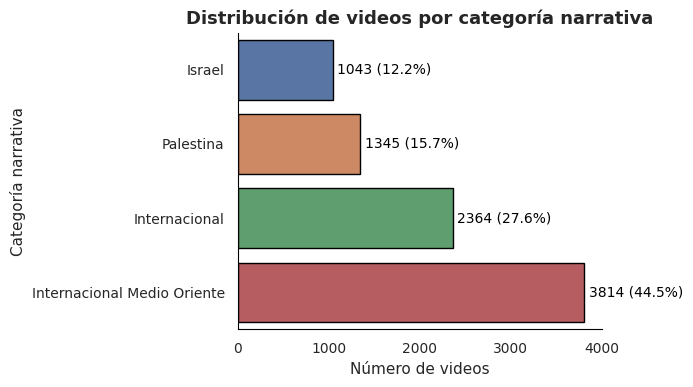

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Configuración profesional
sns.set_theme(style="white")
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'legend.fontsize': 10
})

# Tabla con cantidades y porcentajes
conteo_categoria = df['categoria'].value_counts().reset_index()
conteo_categoria.columns = ['Categoría', 'Cantidad']
conteo_categoria['Porcentaje'] = (conteo_categoria['Cantidad'] / conteo_categoria['Cantidad'].sum() * 100).round(1)
conteo_categoria['Etiqueta'] = conteo_categoria.apply(
    lambda x: f"{x['Cantidad']} ({x['Porcentaje']}%)", axis=1
)
conteo_categoria = conteo_categoria.sort_values('Cantidad', ascending=True)

# Gráfico horizontal
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=conteo_categoria,
    x='Cantidad',
    y='Categoría',
    palette=sns.color_palette("deep"),
    edgecolor='black'
)

# Etiquetas al final de las barras
for i, (v, label) in enumerate(zip(conteo_categoria['Cantidad'], conteo_categoria['Etiqueta'])):
    ax.text(v + 50, i, label, color='black', va='center', fontsize=10)

# Títulos y ejes
plt.title("Distribución de videos por categoría narrativa", weight='bold')
plt.xlabel("Número de videos")
plt.ylabel("Categoría narrativa")
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.show()


## Evolución semanal del volumen de videos recolectados

<ipython-input-13-8817c332890e>:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  conteo_semanal = df.groupby(df['date'].dt.to_period('W').dt.start_time).size().reset_index(name='videos')


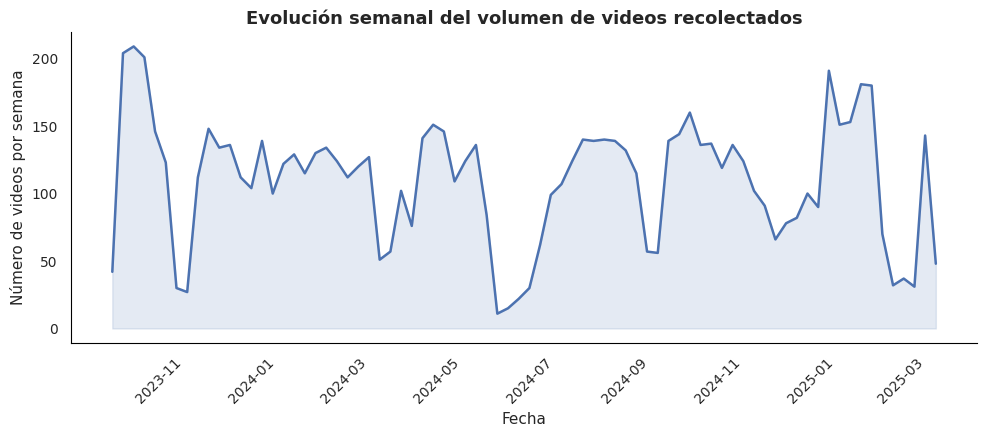

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Estilo profesional sin cuadrícula
sns.set_theme(style="white")
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'legend.fontsize': 10
})

# Agrupar por semana (asegurar datetime)
df['date'] = pd.to_datetime(df['date'])
conteo_semanal = df.groupby(df['date'].dt.to_period('W').dt.start_time).size().reset_index(name='videos')

# Gráfico limpio
plt.figure(figsize=(10, 4.5))
ax = sns.lineplot(data=conteo_semanal, x='date', y='videos', linewidth=1.8, color="#4c72b0")
ax.fill_between(conteo_semanal['date'], conteo_semanal['videos'], alpha=0.15, color="#4c72b0")

# Título y etiquetas
plt.title("Evolución semanal del volumen de videos recolectados", weight='bold', fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Número de videos por semana")
plt.xticks(rotation=45)

# Eliminar líneas y cuadrícula
sns.despine()
ax.grid(False)

plt.tight_layout()
plt.show()


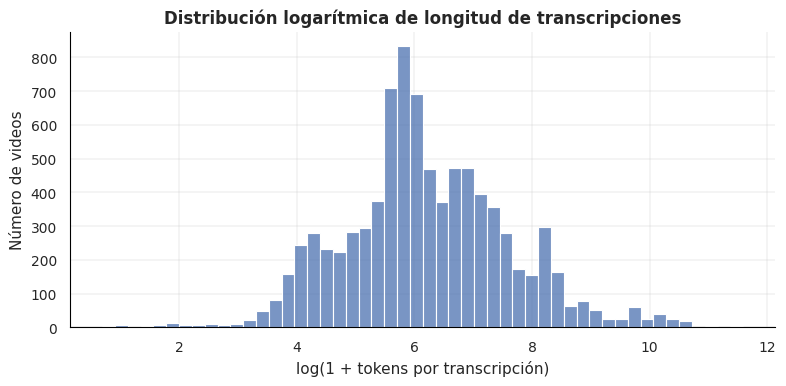

In [ ]:
import numpy as np

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df['transcript_tokens']), bins=50, color="#4c72b0")
plt.title("Distribución logarítmica de longitud de transcripciones", fontsize=12, weight='bold')
plt.xlabel("log(1 + tokens por transcripción)")
plt.ylabel("Número de videos")
plt.grid(True, linewidth=0.3)
sns.despine()
plt.tight_layout()
plt.show()



## Análisis descriptivo del rendimiento y engagement por categoría narrativa

In [ ]:
import numpy as np
import pandas as pd

# Asegurar que las columnas estén en formato numérico
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

# Calcular tasa de engagement de forma segura
df['engagement_rate'] = np.where(
    df['views'] > 0,
    (df['likes'] + df['comments']) / df['views'],
    np.nan
)

# Agrupar por categoría con estadísticas extendidas
estadisticas_categoria = df.groupby('categoria').agg(
    videos_totales=('video_id', 'count'),
    promedio_views=('views', 'mean'),
    mediana_views=('views', 'median'),
    max_views=('views', 'max'),
    std_views=('views', 'std'),
    promedio_likes=('likes', 'mean'),
    std_likes=('likes', 'std'),
    promedio_comments=('comments', 'mean'),
    std_comments=('comments', 'std'),
    promedio_engagement_rate=('engagement_rate', 'mean'),
    std_engagement_rate=('engagement_rate', 'std')
).round(2).reset_index()

# Mostrar tabla
from IPython.display import display
display(estadisticas_categoria)

# Exportar CSV si lo necesitas
estadisticas_categoria.to_csv("/content/drive/MyDrive/TG/output_visualizaciones/estadisticas_engagement_extendido.csv", index=False)


,categoria,videos_totales,promedio_views,mediana_views,max_views,std_views,promedio_likes,std_likes,promedio_comments,std_comments,promedio_engagement_rate,std_engagement_rate
0,Internacional,2364,115725.02,22298.0,9181879,349397.31,1236.27,3804.90,781.00,1955.18,0.02,0.01
1,Internacional Medio Oriente,3814,132931.74,27456.0,39272223,831384.66,6685.07,40853.75,716.06,1920.21,0.07,0.05
2,Israel,1043,77771.52,21639.0,5308812,266923.32,2536.16,10458.65,367.63,1092.54,0.04,0.03
3,Palestina,1345,27367.09,4969.0,1973279,96134.92,1800.30,5651.93,187.33,540.92,0.14,0.10


In [ ]:
estadisticas_categoria.to_excel(
    "/content/drive/MyDrive/TG/output_visualizaciones/estadisticas_engagement_extendido.xlsx",
    index=False,
    engine='openpyxl'
)

In [ ]:
# Mostrar 5 ejemplos aleatorios con todas las columnas del dataset
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', 100)  # Ajusta el ancho de las celdas para ver mejor los textos largos

ejemplo_df = df.sample(5, random_state=42).copy()
display(ejemplo_df)



,video_id,title,channel,date,views,likes,comments,transcript,url,channel_clean,categoria,engagement_rate,transcript_tokens
6171,Cop8Mxwetfg,Arab-Americans’ anger over Gaza threatens Kamala Harris in Michigan | BBC News,BBC News,2024-10-24 21:30:01+00:00,65831,697,826,voters in Dearborn Michigan helped Joe Biden into the White House but Democrats cannot rely on t...,https://www.youtube.com/watch?v=Cop8Mxwetfg,bbc,Internacional,0.023135,501
7606,IGQHYi3nMu0,"ILTV News Flash - War Day 475 | January 23, 2025",ILTV Israel News,2025-01-23 12:00:32+00:00,24621,1098,85,the IDF said it has killed two of the terrorists who carried out last week's murderous shooting ...,https://www.youtube.com/watch?v=IGQHYi3nMu0,iltv,Israel,0.048048,461
7407,QBj-yWLnayM,Who was Edward Said and why are his writings on Orientalism important today?,Middle East Eye,2025-01-15 16:21:42+00:00,19652,1394,78,I think it's terribly unjust and we've not our the Injustice done to us has never really been ac...,https://www.youtube.com/watch?v=QBj-yWLnayM,middle east eye,Internacional Medio Oriente,0.074903,1690
461,BgWvLvFx2bM,What can you do for help #Gaza? Things you have to know about Israel war @AnasalaFamily @munahawwa,PalestineTV تلفزيون فلسطين,2023-10-23 10:20:09+00:00,21740,1317,21,quarter of a nuclear bomb this is equivalent to the bombs dropped on Gaza in less than 10 days b...,https://www.youtube.com/watch?v=BgWvLvFx2bM,palestinetv,Palestina,0.061546,141
6175,6mrOtZEj5RM,Understanding the Gaza Conflict: Perspectives and Disconnections,Voices For Gaza,2024-10-25 02:58:25+00:00,7141,560,44,back with sfia she's preparing for another stint in jail she'll keep being sent to prison until ...,https://www.youtube.com/watch?v=6mrOtZEj5RM,voices for gaza,Palestina,0.084582,77


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import openpyxl # Explicitly import openpyxl if not already imported elsewhere for clarity
import os # Import os for directory creation

# Mostrar 5 ejemplos aleatorios con todas las columnas del dataset
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', 100)  # Ajusta el ancho de las celdas para ver mejor los textos largos

ejemplo_df = df.sample(5, random_state=42).copy()

# --- FIX: Ensure all datetime columns are timezone-naive ---
# Iterate through all columns in the DataFrame
for col in ejemplo_df.columns:
    # Check if the column has a datetime-like dtype and is timezone-aware
    if pd.api.types.is_datetime64_any_dtype(ejemplo_df[col]) and ejemplo_df[col].dt.tz is not None:
        print(f"Removing timezone from column: {col}") # Optional: Print which columns are being processed
        # Convert timezone-aware datetime to timezone-naive datetime
        # Use tz_convert(None) if the timezone is localized
        try:
            ejemplo_df[col] = ejemplo_df[col].dt.tz_convert(None)
        except TypeError:
            # If tz_convert fails (e.g., if it was naive but treated as localized), try tz_localize(None)
             ejemplo_df[col] = ejemplo_df[col].dt.tz_localize(None)

# --- End of FIX ---


display(ejemplo_df)

# Exportar a Excel
# Make sure the output directory exists
output_dir = "/content/drive/MyDrive/TG/output_visualizaciones"
os.makedirs(output_dir, exist_ok=True)

ejemplo_df.to_excel(
    f"{output_dir}/ejemplo_estructura_completa.xlsx",
    index=False,
    engine='openpyxl'
)

Removing timezone from column: date


,video_id,title,channel,date,views,likes,comments,transcript,url,channel_clean,categoria,engagement_rate,transcript_tokens
6171,Cop8Mxwetfg,Arab-Americans’ anger over Gaza threatens Kamala Harris in Michigan | BBC News,BBC News,2024-10-24 21:30:01,65831,697,826,voters in Dearborn Michigan helped Joe Biden into the White House but Democrats cannot rely on t...,https://www.youtube.com/watch?v=Cop8Mxwetfg,bbc,Internacional,0.023135,501
7606,IGQHYi3nMu0,"ILTV News Flash - War Day 475 | January 23, 2025",ILTV Israel News,2025-01-23 12:00:32,24621,1098,85,the IDF said it has killed two of the terrorists who carried out last week's murderous shooting ...,https://www.youtube.com/watch?v=IGQHYi3nMu0,iltv,Israel,0.048048,461
7407,QBj-yWLnayM,Who was Edward Said and why are his writings on Orientalism important today?,Middle East Eye,2025-01-15 16:21:42,19652,1394,78,I think it's terribly unjust and we've not our the Injustice done to us has never really been ac...,https://www.youtube.com/watch?v=QBj-yWLnayM,middle east eye,Internacional Medio Oriente,0.074903,1690
461,BgWvLvFx2bM,What can you do for help #Gaza? Things you have to know about Israel war @AnasalaFamily @munahawwa,PalestineTV تلفزيون فلسطين,2023-10-23 10:20:09,21740,1317,21,quarter of a nuclear bomb this is equivalent to the bombs dropped on Gaza in less than 10 days b...,https://www.youtube.com/watch?v=BgWvLvFx2bM,palestinetv,Palestina,0.061546,141
6175,6mrOtZEj5RM,Understanding the Gaza Conflict: Perspectives and Disconnections,Voices For Gaza,2024-10-25 02:58:25,7141,560,44,back with sfia she's preparing for another stint in jail she'll keep being sent to prison until ...,https://www.youtube.com/watch?v=6mrOtZEj5RM,voices for gaza,Palestina,0.084582,77


In [ ]:
df.head()

,video_id,title,channel,date,views,likes,comments,transcript,url,channel_clean,categoria,engagement_rate,transcript_tokens
0,9yqrXWzZhTw,"🔴 BREAKING: ROCKETS LAUNCHED INTO ISRAEL FROM GAZA, HAMAS TERRORISTS INFILTRATE ISRAEL",i24NEWS English,2023-10-07 07:03:32+00:00,179781,2448,1636,of rockets targeting the South the center the east of the country from BBA through Tel Aviv to J...,https://www.youtube.com/watch?v=9yqrXWzZhTw,i24news,Israel,0.022717,4170
1,AOHg8s-_ptk,🔴 HAMAS TERRORISTS INFILTRATE SOUTHERN ISRAEL,i24NEWS English,2023-10-07 09:19:38+00:00,109983,1321,895,under non-stop massive hours long barges of rockets targeting the South the center the east of t...,https://www.youtube.com/watch?v=AOHg8s-_ptk,i24news,Israel,0.020149,6336
2,rZyEJLTERy4,"Ghazi Hamad, Hamas Spokesman: Offensive against Israel",Al Jazeera English,2023-10-07 09:29:51+00:00,84412,1307,551,hammad he's a Hamas spokesman and a former deputy foreign minister for the government in Gaza an...,https://www.youtube.com/watch?v=rZyEJLTERy4,al jazeera,Internacional Medio Oriente,0.022011,1007
3,CwOQRonqwIc,Israel-Palestine Conflict: Iran expected reaction,Al Jazeera English,2023-10-07 10:36:05+00:00,227569,2467,1183,uh dorsa so has there been actually any any reaction from Iran today there hasn't been any offic...,https://www.youtube.com/watch?v=CwOQRonqwIc,al jazeera,Internacional Medio Oriente,0.016039,854
4,NCYQj3Xm8jo,Israel: Hamas launch surprise rocket attack from Gaza - BBC News,BBC News,2023-10-07 11:04:56+00:00,2573081,20153,8873,we start in the Middle East where security forces in southern Israel have moved to a war footing...,https://www.youtube.com/watch?v=NCYQj3Xm8jo,bbc,Internacional,0.011281,1105


In [ ]:
# Elegimos una muestra representativa (por ejemplo, los primeros 5)
muestra = df[['channel_clean', 'categoria', 'date', 'views', 'likes', 'comments', 'transcript']].copy().head(5)

# Anonimizamos el título y ocultamos video_id / url
muestra.insert(0, 'video_anon', [f"Video {i+1}" for i in range(len(muestra))])
muestra['titulo_anon'] = [
    "[T1] Ataque en frontera sur",
    "[T2] Declaración desde Gaza",
    "[T3] Declaración internacional",
    "[T4] Reacción diplomática",
    "[T5] Cobertura BBC"
]

# Solo mostrar fragmento inicial del transcript
muestra['transcripción'] = muestra['transcript'].str.slice(0, 60) + '...'
muestra = muestra.drop(columns=['transcript'])

# Reordenar columnas
muestra = muestra[['video_anon', 'titulo_anon', 'channel_clean', 'categoria', 'date', 'views', 'likes', 'comments', 'transcripción']]

# Mostrar tabla formateada
from IPython.display import display
import pandas as pd

pd.set_option("display.max_colwidth", None)
display(muestra.style.set_properties(**{
    'background-color': '#f9f9f9',
    'border-color': 'lightgray',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'left',
    'padding': '4px'
}).set_caption("Tabla XX. Ejemplo anonimizado de la estructura de videos recolectados"))


,video_anon,titulo_anon,channel_clean,categoria,date,views,likes,comments,transcripción
0,Video 1,[T1] Ataque en frontera sur,i24news,Israel,2023-10-07 07:03:32+00:00,179781,2448,1636,of rockets targeting the South the center the east of the co...
1,Video 2,[T2] Declaración desde Gaza,i24news,Israel,2023-10-07 09:19:38+00:00,109983,1321,895,under non-stop massive hours long barges of rockets targetin...
2,Video 3,[T3] Declaración internacional,al jazeera,Internacional Medio Oriente,2023-10-07 09:29:51+00:00,84412,1307,551,hammad he's a Hamas spokesman and a former deputy foreign mi...
3,Video 4,[T4] Reacción diplomática,al jazeera,Internacional Medio Oriente,2023-10-07 10:36:05+00:00,227569,2467,1183,uh dorsa so has there been actually any any reaction from Ir...
4,Video 5,[T5] Cobertura BBC,bbc,Internacional,2023-10-07 11:04:56+00:00,2573081,20153,8873,we start in the Middle East where security forces in souther...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import matplotlib as mpl

# === Datos de ejemplo (ya formateados) ===
muestra = df[['channel_clean', 'categoria', 'date', 'views', 'likes', 'comments', 'transcript']].copy().head(5)
muestra.insert(0, 'video_anon', [f"Video {i+1}" for i in range(len(muestra))])
muestra['titulo_anon'] = [
    "[T1] Ataque en frontera sur",
    "[T2] Declaración desde Gaza",
    "[T3] Declaración internacional",
    "[T4] Reacción diplomática",
    "[T5] Cobertura BBC"
]
muestra['transcripción'] = muestra['transcript'].str.slice(0, 60) + '...'
muestra = muestra.drop(columns=['transcript'])
muestra = muestra[['video_anon', 'titulo_anon', 'channel_clean', 'categoria', 'date', 'views', 'likes', 'comments', 'transcripción']]

# === Guardar tabla como imagen ===
fig, ax = plt.subplots(figsize=(14, 3))  # Ajusta el tamaño según la cantidad de columnas/filas
ax.axis('off')
tbl = table(ax, muestra, loc='center', cellLoc='left', colWidths=[0.1]*len(muestra.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.1, 1.5)

# Estilo personalizado (opcional)
for key, cell in tbl.get_celld().items():
    cell.set_linewidth(0.5)
    if key[0] == 0:  # Encabezado
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#DDEEFF')
    else:
        cell.set_facecolor('#F9F9F9')

plt.tight_layout()
plt.savefig("tabla_ejemplo_anonimizada.png", dpi=300, bbox_inches='tight')
plt.close()

